In [72]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, auc

### Modelling

In [93]:
train = pd.read_csv("./train.csv")
val = pd.read_csv("./validation.csv")
test = pd.read_csv("./test.csv")

X_train, y_train = train.drop("spam", axis = 1), train["spam"]
X_val, y_val = val.drop("spam", axis = 1), val["spam"]
X_test, y_test = test.drop("spam", axis = 1), test["spam"]

#### Vectorization using TF-IDF

In [105]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train["text"])

In [110]:
def display_confusion_matrix(y_val, y_pred):
    target_labels = ["Not Spam", "Spam"]
    cm = confusion_matrix(y_val, y_pred, normalize = "true")
    display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = target_labels)
    fig, ax = plt.subplots(figsize = (5, 3))
    display_cm.plot(ax = ax, cmap = "Blues")

def evaluate(y_val, y_pred):
    print("Score: ")
    print("Classification Report:\n {}".format(classification_report(y_val, y_pred)))
    precision = precision_score(y_val, y_pred)
    print("Precision: {}".format(precision))
    recall = recall_score(y_val, y_pred)
    print("Recall: {}".format(recall))
    display_confusion_matrix(y_val, y_pred)
    return precision, recall

#### 1. Multinomial Naive Bayes

Score: 
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93       419
           1       1.00      0.60      0.75       148

    accuracy                           0.90       567
   macro avg       0.94      0.80      0.84       567
weighted avg       0.91      0.90      0.89       567

Precision: 1.0
Recall: 0.6013513513513513


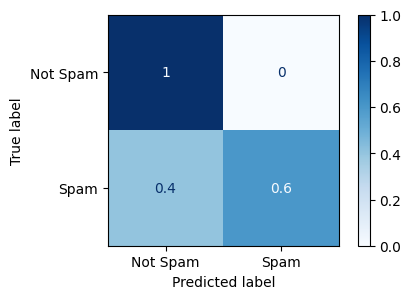

In [113]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

y_pred_mnb = mnb.predict(vectorizer.transform(X_val["text"]))

precision, recall = evaluate(y_val, y_pred_mnb)


#### 2. Logistic Regression

Score: 
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       419
           1       0.99      0.96      0.98       148

    accuracy                           0.99       567
   macro avg       0.99      0.98      0.98       567
weighted avg       0.99      0.99      0.99       567

Precision: 0.993006993006993
Recall: 0.9594594594594594


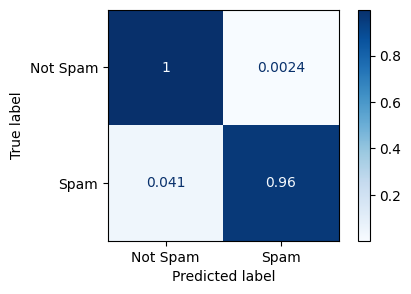

In [114]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(vectorizer.transform(X_val["text"]))

precision, recall = evaluate(y_val, y_pred_lr)

#### 3. Decision Tree Classifier

Score: 
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.95       419
           1       0.78      0.98      0.87       148

    accuracy                           0.92       567
   macro avg       0.89      0.94      0.91       567
weighted avg       0.94      0.92      0.93       567

Precision: 0.7837837837837838
Recall: 0.9797297297297297


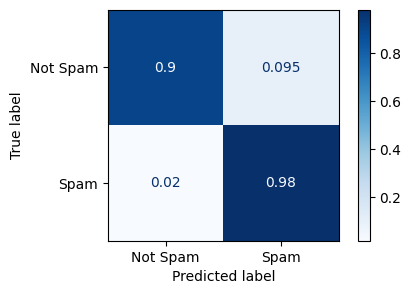

In [115]:
dtc = DecisionTreeClassifier(criterion = "gini", splitter = "best", max_depth = 5, random_state = 54)
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(vectorizer.transform(X_val["text"]))

precision, recall = evaluate(y_val, y_pred_dtc)

##### Hyperparameter tuning with Grid Search

In [62]:
param_grid = [
    {"criterion" : ["entropy", "gini"], "max_depth" : [4, 5, 6, 7]}
]

tree = DecisionTreeClassifier(class_weight = "balanced", random_state = 54)
grid_search = GridSearchCV(tree, param_grid, scoring = "precision", cv = 5)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=54),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': [4, 5, 6, 7]}],
             scoring='precision')

In [63]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=7, random_state=54)

Score: 
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.92      0.95       419
           1       0.81      0.98      0.88       148

    accuracy                           0.93       567
   macro avg       0.90      0.95      0.92       567
weighted avg       0.94      0.93      0.93       567

Precision: 0.8055555555555556
Recall: 0.9797297297297297


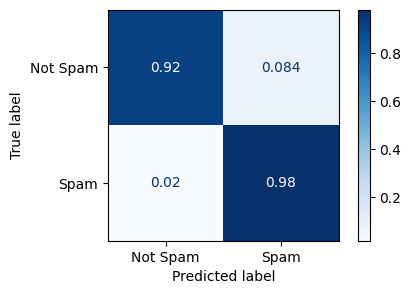

In [116]:
tree_best = grid_search.best_estimator_
tree_best.fit(X_train, y_train)

y_pred_tree = tree_best.predict(vectorizer.transform(X_val["text"]))

precision, recall = evaluate(y_val, y_pred_tree)

#### 4. Random Forest Classifier

Score: 
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       419
           1       0.99      0.99      0.99       148

    accuracy                           0.99       567
   macro avg       0.99      0.99      0.99       567
weighted avg       0.99      0.99      0.99       567

Precision: 0.9931972789115646
Recall: 0.9864864864864865


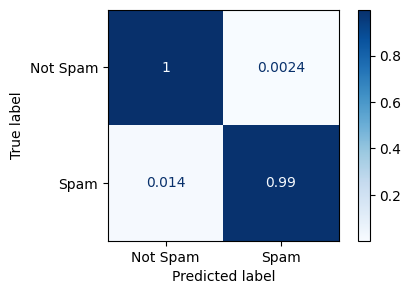

In [117]:
rfc = RandomForestClassifier(n_estimators = 1000, 
                             min_samples_split = 60,
                             criterion = "log_loss",
                             class_weight = "balanced", 
                             random_state = 54)
rfc.fit(X_train, y_train)

y_pred_rfc = rfc.predict(vectorizer.transform(X_val["text"]))

precision, recall = evaluate(y_val, y_pred_rfc)

The parameters used to train Random Forest Classifier are giving pretty good results, there is no need of hyperparameter tuning.

#### 5. Support Vector Classifier (SVC)

Score: 
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       419
           1       0.99      0.98      0.99       148

    accuracy                           0.99       567
   macro avg       0.99      0.99      0.99       567
weighted avg       0.99      0.99      0.99       567

Precision: 0.9931506849315068
Recall: 0.9797297297297297


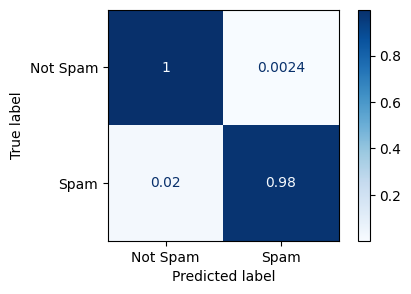

In [118]:
svc = SVC(kernel = "sigmoid")
svc.fit(X_train, y_train)

y_pred_svc = svc.predict(vectorizer.transform(X_val["text"]))

precision, recall = evaluate(y_val, y_pred_svc)

### Precision Recall Curve

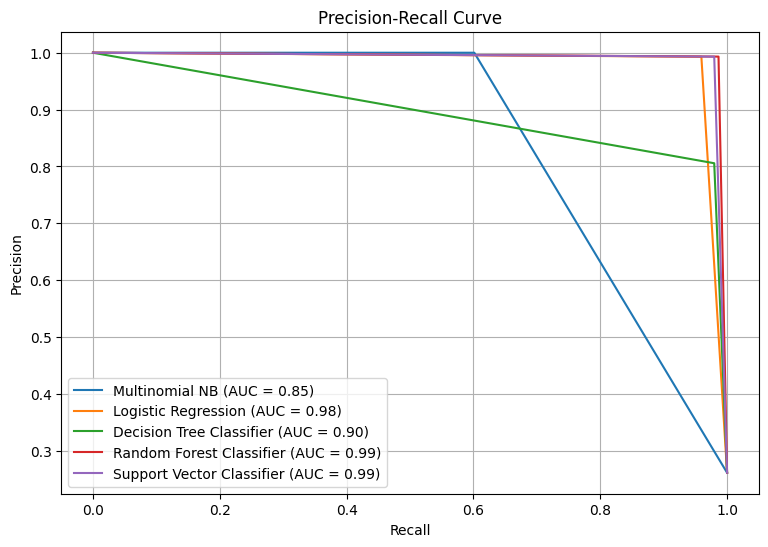

In [79]:
predictions = [
    ("Multinomial NB", y_pred_mnb),
    ("Logistic Regression", y_pred_lr),
    ("Decision Tree Classifier", y_pred_tree),
    ("Random Forest Classifier", y_pred_rfc),
    ("Support Vector Classifier", y_pred_svc)
]

def pr_curve(predictions):
    plt.figure(figsize = (9, 6))
    for model_name, pred in predictions:
        precision, recall, _ = precision_recall_curve(y_val, pred)
        auc_score = auc(recall, precision)
        plt.plot(recall, precision, label = f"{model_name} (AUC = {auc_score:.2f})")

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

pr_curve(predictions)



##### The 3 benchmark models from the precision recall curve on train and validation sets are 
##### -`Logistic Regression` with `AUC = 0.98`, 
##### -`Random Forest Classifier` with `AUC = 0.99`, 
##### -`Support Vector Classifier` with `AUC = 0.99`

#### Train these models on the train and validation sets combined, then we'll score and evaluate on test set

In [120]:
train_val = pd.concat([train, val], ignore_index = True)
X_train_val, y_train_val = train_val.drop("spam", axis = 1), train_val["spam"]
X_train_val = vectorizer.fit_transform(X_train_val["text"])

In [126]:
scores = []

def modelling(model):
    model.fit(X_train_val, y_train_val)
    y_pred = model.predict(vectorizer.transform(X_test["text"]))
    precision, recall = evaluate(y_test, y_pred)
    return precision, recall

### Logistic Regression

Score: 
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       428
           1       1.00      0.94      0.97       145

    accuracy                           0.98       573
   macro avg       0.99      0.97      0.98       573
weighted avg       0.98      0.98      0.98       573

Precision: 1.0
Recall: 0.9379310344827586


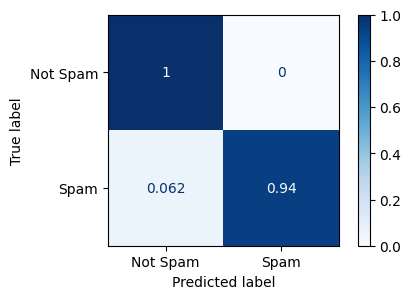

In [127]:
prec_lr, rec_lr = modelling(LogisticRegression())
scores.append(("Linear Regression", prec_lr, rec_lr))

### Random Forest Classifier

Score: 
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       428
           1       0.97      0.97      0.97       145

    accuracy                           0.99       573
   macro avg       0.98      0.98      0.98       573
weighted avg       0.99      0.99      0.99       573

Precision: 0.9724137931034482
Recall: 0.9724137931034482


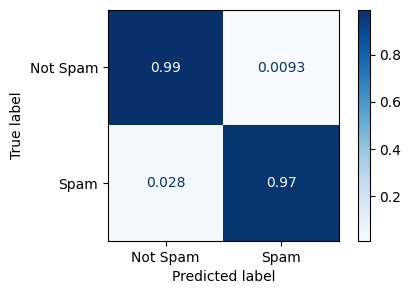

In [128]:
prec_rfc, rec_rfc = modelling(RandomForestClassifier(n_estimators = 1000, 
                             min_samples_split = 60,
                             criterion = "log_loss",
                             class_weight = "balanced", 
                             random_state = 54))
scores.append(("Random Forest Classifier", prec_rfc, rec_rfc))

### Support Vector Classifier

Score: 
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       428
           1       1.00      0.98      0.99       145

    accuracy                           0.99       573
   macro avg       1.00      0.99      0.99       573
weighted avg       0.99      0.99      0.99       573

Precision: 1.0
Recall: 0.9793103448275862


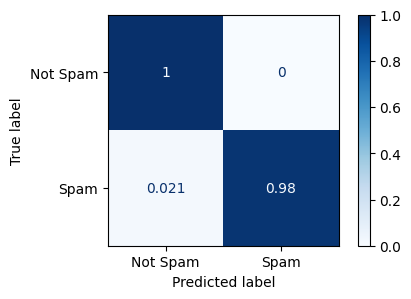

In [129]:
prec_svc, rec_svc = modelling(SVC(kernel = "sigmoid"))
scores.append(("Support Vector Classifier", prec_svc, rec_svc))

## Scores on test data

In [132]:
df = pd.DataFrame(scores, columns = ["Model", "Precision", "Recall"])
display(df)

,Model,Precision,Recall
0,Linear Regression,1.000000,0.937931
1,Random Forest Classifier,0.972414,0.972414
2,Support Vector Classifier,1.000000,0.979310
